In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
r = 28
sigma = 10
beta = 8 / 3

In [1]:
def runge_kutta(f1, f2, f3, y0, t0, h, n):
    y = np.zeros((n + 1, 3))
    y[0] = y0

    for i in range(n):
        k1_1 = f1(t0 + i * h, y[i])
        k1_2 = f2(t0 + i * h, y[i])
        k1_3 = f3(t0 + i * h, y[i])

        k2_1 = f1(t0 + i * h + h / 2, y[i] + (h / 2) * k1_1)
        k2_2 = f2(t0 + i * h + h / 2, y[i] + (h / 2) * k1_2)
        k2_3 = f3(t0 + i * h + h / 2, y[i] + (h / 2) * k1_3)

        k3_1 = f1(t0 + i * h + h / 2, y[i] + (h / 2) * k2_1)
        k3_2 = f2(t0 + i * h + h / 2, y[i] + (h / 2) * k2_2)
        k3_3 = f3(t0 + i * h + h / 2, y[i] + (h / 2) * k2_3)

        k4_1 = f1(t0 + i * h + h, y[i] + h * k3_1)
        k4_2 = f2(t0 + i * h + h, y[i] + h * k3_2)
        k4_3 = f3(t0 + i * h + h, y[i] + h * k3_3)

        y[i + 1, 0] = y[i, 0] + (h / 6) * (k1_1 + 2 * k2_1 + 2 * k3_1 + k4_1)
        y[i + 1, 1] = y[i, 1] + (h / 6) * (k1_2 + 2 * k2_2 + 2 * k3_2 + k4_2)
        y[i + 1, 2] = y[i, 2] + (h / 6) * (k1_3 + 2 * k2_3 + 2 * k3_3 + k4_3)
    return y

In [1]:
def func1(t, y):
    return sigma * (y[1] - y[0])

In [1]:
def func2(t, y):
    return y[0] * (r - y[2]) - y[1]

In [1]:
def func3(t, y):
    return y[0] * y[1] - beta * y[2]

In [1]:
y0 = [1, 1, 1]

t0, h = 0, 0.01
y = runge_kutta(func1, func2, func3, y0, t0, h, 10000)

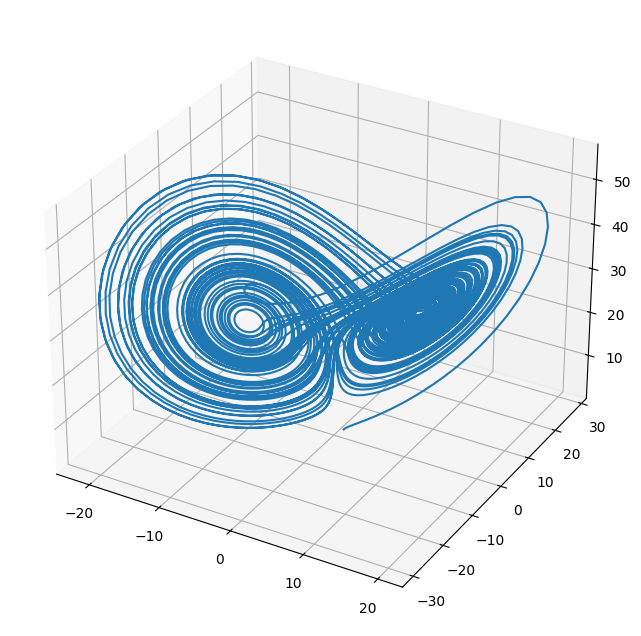

In [1]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

ax.plot(y[:, 0], y[:, 1], y[:, 2])
plt.show()